In [7]:
%load_ext autoreload
%autoreload 2

import sys, os
from pathlib import Path
parent_dir = Path.cwd().resolve()
if parent_dir.name == 'testing':
    parent_dir = parent_dir.parent
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
os.chdir(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import validation
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Posterior variance and posterior predictive

Using KDE as a reliable approximation of the posterior given MLE, we can:
- Tabulate posterior variance for different k and m
- Sample from the posterior predictive distribution

In [2]:
# Run variance sweep to get posterior variance (from KDE) for each (k, m)
ks = [1.0, 2.0, 3.0, 5.0]
ms = [10, 20, 50, 100]
mu_true = 2.0
T_gibbs = 50000
T_kde = 50000
base_params = {'mu_true': mu_true, 'prior_mean': 0.0, 'prior_std': 10.0, 'proposal_std_mu': 0.9, 'proposal_std_z': 0.03}

sweep_results = validation.run_variance_sweep(
    ks=ks, ms=ms, mu_true=mu_true,
    T_gibbs=T_gibbs, T_kde=T_kde, base_params=base_params,
    seed=0, verbose=True,
)
df = pd.DataFrame(sweep_results)

# Pivot: posterior variance (KDE) by k and m
pivot_var = df.pivot(index='k', columns='m', values='kde_variance')
print("Posterior variance (KDE) by k and m:")
print(pivot_var.to_string())


Processing k=1.0, m=10
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:41<00:00, 1196.15it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.5414
Z_i Acceptance Rate: 0.4866
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = 0.001


/Users/shlokmishra/code/student_t_mle/utils.py:88: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda mu: np.exp(log_unnorm(mu)), -np.inf, np.inf)


  Gibbs variance: 87.382937
  KDE variance:   0.533422
  Variance ratio (Gibbs/KDE): 163.8158
  Time - Gibbs: 41.91s, KDE: 9.08s

Processing k=1.0, m=20
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:47<00:00, 1058.55it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.4223
Z_i Acceptance Rate: 0.7735
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = 0.001


/Users/shlokmishra/code/student_t_mle/utils.py:88: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda mu: np.exp(log_unnorm(mu)), -np.inf, np.inf)


  Gibbs variance: 0.147802
  KDE variance:   0.117240
  Variance ratio (Gibbs/KDE): 1.2607
  Time - Gibbs: 47.27s, KDE: 9.19s

Processing k=1.0, m=50
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:03<00:00, 782.69it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.2799
Z_i Acceptance Rate: 0.7783
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = 0.001
  Gibbs variance: 0.044608
  KDE variance:   0.044360
  Variance ratio (Gibbs/KDE): 1.0056
  Time - Gibbs: 63.92s, KDE: 4.96s

Processing k=1.0, m=100
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:31<00:00, 548.82it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.2009
Z_i Acceptance Rate: 0.7802
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = 0.001
  Gibbs variance: 0.021308
  KDE variance:   0.020733
  Variance ratio (Gibbs/KDE): 1.0277
  Time - Gibbs: 91.14s, KDE: 7.66s

Processing k=2.0, m=10
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:40<00:00, 1226.89it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.4958
Z_i Acceptance Rate: 0.7109
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.226478
  KDE variance:   0.191750
  Variance ratio (Gibbs/KDE): 1.1811
  Time - Gibbs: 40.76s, KDE: 7.07s

Processing k=2.0, m=20
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:44<00:00, 1119.59it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.3781
Z_i Acceptance Rate: 0.7201
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.095813
  KDE variance:   0.091337
  Variance ratio (Gibbs/KDE): 1.0490
  Time - Gibbs: 44.66s, KDE: 4.88s

Processing k=2.0, m=50
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:01<00:00, 819.27it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.2492
Z_i Acceptance Rate: 0.7260
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.033806
  KDE variance:   0.034933
  Variance ratio (Gibbs/KDE): 0.9677
  Time - Gibbs: 61.04s, KDE: 5.58s

Processing k=2.0, m=100
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:27<00:00, 568.34it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.1789
Z_i Acceptance Rate: 0.7245
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.017365
  KDE variance:   0.016984
  Variance ratio (Gibbs/KDE): 1.0224
  Time - Gibbs: 87.98s, KDE: 5.85s

Processing k=3.0, m=10
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:39<00:00, 1266.36it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.4680
Z_i Acceptance Rate: 0.7206
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.180557
  KDE variance:   0.160398
  Variance ratio (Gibbs/KDE): 1.1257
  Time - Gibbs: 39.49s, KDE: 4.99s

Processing k=3.0, m=20
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:44<00:00, 1126.91it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.3601
Z_i Acceptance Rate: 0.7286
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.081361
  KDE variance:   0.077986
  Variance ratio (Gibbs/KDE): 1.0433
  Time - Gibbs: 44.37s, KDE: 5.56s

Processing k=3.0, m=50
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:00<00:00, 820.03it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.2379
Z_i Acceptance Rate: 0.7317
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.031372
  KDE variance:   0.030644
  Variance ratio (Gibbs/KDE): 1.0238
  Time - Gibbs: 60.98s, KDE: 5.07s

Processing k=3.0, m=100
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:27<00:00, 569.28it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.1688
Z_i Acceptance Rate: 0.7321
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.015245
  KDE variance:   0.015180
  Variance ratio (Gibbs/KDE): 1.0043
  Time - Gibbs: 87.84s, KDE: 6.08s

Processing k=5.0, m=10
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:39<00:00, 1261.08it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.4414
Z_i Acceptance Rate: 0.8022
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.143954
  KDE variance:   0.140214
  Variance ratio (Gibbs/KDE): 1.0267
  Time - Gibbs: 39.65s, KDE: 5.18s

Processing k=5.0, m=20
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [00:44<00:00, 1128.65it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.3312
Z_i Acceptance Rate: 0.7994
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.069412
  KDE variance:   0.068489
  Variance ratio (Gibbs/KDE): 1.0135
  Time - Gibbs: 44.30s, KDE: 5.58s

Processing k=5.0, m=50
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:00<00:00, 820.67it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.2201
Z_i Acceptance Rate: 0.8036
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.026188
  KDE variance:   0.027351
  Variance ratio (Gibbs/KDE): 0.9575
  Time - Gibbs: 60.93s, KDE: 5.28s

Processing k=5.0, m=100
  Running Gibbs sampler (T=50,000)...


Running Gibbs Sampler: 100%|██████████| 50000/50000 [01:27<00:00, 571.62it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.1567
Z_i Acceptance Rate: 0.8046
  Computing KDE posterior (50,000 simulations)...

--- Computing Benchmark KDE from 50000 simulations ---
  Processing simulation 10000/50000...
  Processing simulation 20000/50000...
  Processing simulation 30000/50000...
  Processing simulation 40000/50000...
  Processing simulation 50000/50000...
Fitting KDE to MLE samples using bw_method = scott
  Gibbs variance: 0.013072
  KDE variance:   0.013525
  Variance ratio (Gibbs/KDE): 0.9665
  Time - Gibbs: 87.48s, KDE: 5.45s
Posterior variance (KDE) by k and m:
m         10        20        50        100
k                                          
1.0  0.533422  0.117240  0.044360  0.020733
2.0  0.191750  0.091337  0.034933  0.016984
3.0  0.160398  0.077986  0.030644  0.015180
5.0  0.140214  0.068489  0.027351  0.013525


## Information loss ratio: Var(μ|μ*) / Var(μ|x)

Compares how much uncertainty about μ remains when only the MLE is observed, versus when the full data is available. A ratio > 1 means the MLE posterior is wider (less informative) than the full-data posterior — the MLE "loses" information about μ.

In [ ]:
# Information loss: Var(μ|μ*) from KDE vs Var(μ|x) from full-data MCMC
ks_il = [1.0, 2.0, 3.0, 5.0]
ms_il = [10, 20, 50, 100]

il_results = analysis.run_info_loss_sweep(
    ks=ks_il, ms=ms_il, mu_true=mu_true,
    T_kde=T_kde, T_fulldata=T_gibbs,
    base_params=base_params, seed=0, verbose=True,
)
df_il = pd.DataFrame(il_results)

# Pivot table: info loss ratio by k and m
pivot_il = df_il.pivot(index='k', columns='m', values='info_loss_ratio')
print("\nInformation loss ratio Var(μ|μ*) / Var(μ|x) by k and m:")
print(pivot_il.to_string())
print("\n(Ratio > 1 means MLE posterior is wider → more uncertainty → more privacy)")
print("(Ratio ≈ 1 means MLE retains nearly all information about μ)")

In [ ]:
# Visualize info loss ratio
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: ratio vs m for each k
for k_val in ks_il:
    mask = df_il['k'] == k_val
    axes[0].plot(df_il[mask]['m'], df_il[mask]['info_loss_ratio'], 'o-', linewidth=2, markersize=8, label=f'k={k_val}')
axes[0].axhline(1.0, color='black', linestyle='--', alpha=0.5, label='No loss')
axes[0].set_xlabel('m (sample size)')
axes[0].set_ylabel('Var(μ|μ*) / Var(μ|x)')
axes[0].set_title('Information loss ratio vs m')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right: Var(μ|μ*) and Var(μ|x) side by side for k=1 (Cauchy)
mask_cauchy = df_il['k'] == 1.0
m_vals = df_il[mask_cauchy]['m'].values
axes[1].plot(m_vals, df_il[mask_cauchy]['var_mle'], 's-', linewidth=2, markersize=8, label='Var(μ|μ*) [KDE]')
axes[1].plot(m_vals, df_il[mask_cauchy]['var_fulldata'], 'o-', linewidth=2, markersize=8, label='Var(μ|x) [full data]')
axes[1].set_xlabel('m (sample size)')
axes[1].set_ylabel('Posterior variance')
axes[1].set_title('Posterior variance comparison (k=1, Cauchy)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Running Gibbs Sampler:   0%|          | 0/5000 [00:00<?, ?it/s]

Running Gibbs Sampler: 100%|██████████| 5000/5000 [00:03<00:00, 1256.38it/s]



--- Sampling Complete ---
Mu Acceptance Rate: 0.2716
Z_i Acceptance Rate: 0.7795

--- Computing Benchmark KDE from 5000 simulations ---
Fitting KDE to MLE samples using bw_method = 0.001


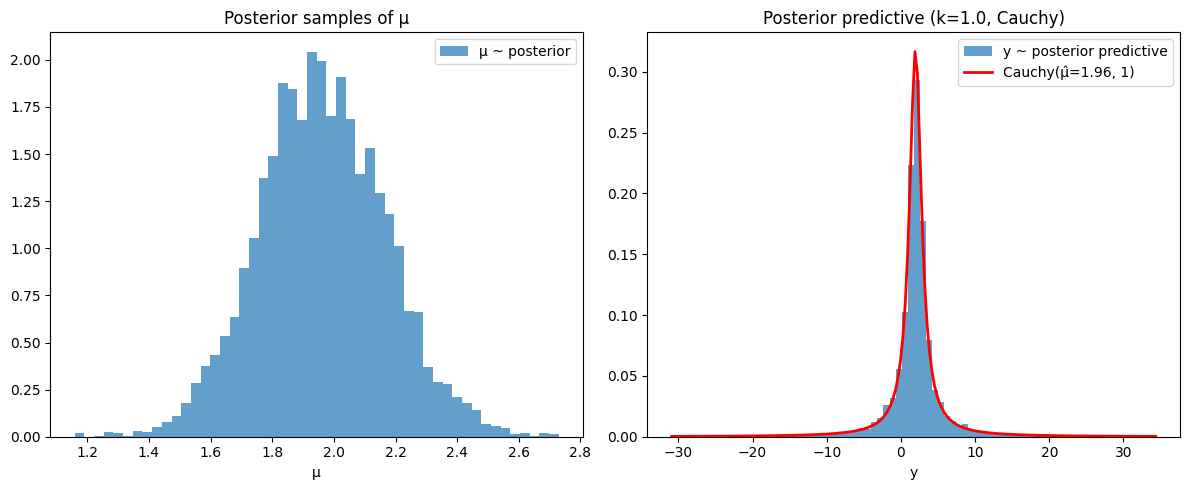

In [8]:
# Posterior predictive: sample from KDE posterior of μ, then y ~ t(μ, k)
# Use a single (k, m) case - get KDE posterior from a quick run
single = validation.run_single_gibbs_kde(
    k=1.0, m=50, mu_true=mu_true,
    T_gibbs=5000, T_kde=5000,  # smaller for speed
)
kde_pdf = single['kde_posterior_pdf']
k = 1.0

mu_samples, y_samples = analysis.posterior_predictive_samples(
    kde_pdf, k=k, n_mu_samples=5000, n_predictive_per_mu=1, seed=42
)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(mu_samples, bins=50, density=True, alpha=0.7, label='μ ~ posterior')
axes[0].set_xlabel('μ')
axes[0].set_title('Posterior samples of μ')
axes[0].legend()

# Cauchy has heavy tails: bin only over central 98% so the peak is visible
ylo, yhi = np.percentile(y_samples, [1, 99])
axes[1].hist(y_samples, bins=80, density=True, alpha=0.7, label='y ~ posterior predictive', range=(ylo, yhi))
# Overlay theoretical Cauchy at posterior mean
mu_mean = np.mean(mu_samples)
x_grid = np.linspace(ylo, yhi, 200)
axes[1].plot(x_grid, stats.t.pdf(x_grid, df=k, loc=mu_mean, scale=1), 'r-', lw=2, label=f'Cauchy(μ̂={mu_mean:.2f}, 1)')
axes[1].set_xlabel('y')
axes[1].set_title(f'Posterior predictive (k={k}, Cauchy)')
axes[1].legend()
plt.tight_layout()
plt.show()

### DP framing

The MLE can be viewed as a private release: the posterior given MLE summarizes what remains private about the data. Posterior variance decreases with m (more data → less uncertainty). The posterior predictive characterizes the distribution of future observations given the MLE.